# Exercici 2.9. Anàlisi d’una plataforma de streaming de vídeo

Descripció dels fitxers (esquema)

videos.csv

video_id (int)

title (str)

genre (str)

duration_min (float)

publish_date (YYYY-MM-DD)

viewers.csv

viewer_id (int)

name (str)

age (int)

country (str)

subscription (str) — free o premium

views.csv

view_id (int)

viewer_id (int)

video_id (int)

watch_minutes (float)

view_date (YYYY-MM-DD HH:MM:SS)

completed (0/1) — si el vídeo es va veure completament

Llegir CSV i mostrar head().

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
videos_df = pd.read_csv('./data/videos.csv')
views_df = pd.read_csv('./data/views.csv')
viewers_df = pd.read_csv('./data/viewers.csv')
print("=== Videos DataFrame ===")
print(videos_df.head())
print("\n=== Views DataFrame ===")
print(views_df.head())
print("\n=== Viewers DataFrame ===")
print(viewers_df.head())

=== Videos DataFrame ===
   video_id    title   genre  duration_min publish_date
0         1  Video 1  Comedy            21   2020-01-01
1         2  Video 2  Sports            61   2020-01-02
2         3  Video 3  Sports            58   2020-01-03
3         4  Video 4  Sports            34   2020-01-04
4         5  Video 5  Sci-Fi            37   2020-01-05

=== Views DataFrame ===
   view_id  viewer_id  video_id  watch_minutes            view_date  completed
0        1       5593       114           8.00  2023-07-24 01:40:00          1
1        2       5363        59          10.26  2023-03-29 17:51:00          0
2        3       5576       224           2.60  2023-06-13 22:15:00          0
3        4       5470       137          39.68  2023-09-08 16:52:00          0
4        5       5069       213          18.90  2023-08-22 00:41:00          0

=== Viewers DataFrame ===
   viewer_id      name  age  country subscription
0       5000  Viewer 0   59  Germany      premium
1       5001 

Combinar a views_df (views join videos join viewers).

In [3]:
views_df = views_df.merge(videos_df, on='video_id', how='left')
views_df = views_df.merge(viewers_df, on='viewer_id', how='left')
views_df

,view_id,viewer_id,video_id,watch_minutes,view_date,completed,title,genre,duration_min,publish_date,name,age,country,subscription
0,1,5593,114,8.00,2023-07-24 01:40:00,1,Video 114,Drama,8,2020-04-23,Viewer 593,27,Italy,premium
1,2,5363,59,10.26,2023-03-29 17:51:00,0,Video 59,Sports,94,2020-02-28,Viewer 363,51,Germany,free
2,3,5576,224,2.60,2023-06-13 22:15:00,0,Video 224,Sports,18,2020-08-11,Viewer 576,29,Italy,free
3,4,5470,137,39.68,2023-09-08 16:52:00,0,Video 137,Drama,48,2020-05-16,Viewer 470,79,Italy,free
4,5,5069,213,18.90,2023-08-22 00:41:00,0,Video 213,Sports,30,2020-07-31,Viewer 69,37,France,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,5640,6,2.44,2023-10-08 03:46:00,0,Video 6,Sports,115,2020-01-06,Viewer 640,67,UK,premium
4996,4997,5380,268,0.48,2023-04-26 21:34:00,0,Video 268,Documentary,5,2020-09-24,Viewer 380,68,Spain,free
4997,4998,5150,230,6.16,2023-08-05 04:11:00,0,Video 230,Sci-Fi,35,2020-08-17,Viewer 150,44,USA,premium
4998,4999,5500,87,17.10,2023-10-27 06:43:00,0,Video 87,Sports,57,2020-03-27,Viewer 500,58,Italy,premium


Comprovar shape i info().

In [4]:
views_df.shape
views_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   view_id        5000 non-null   int64  
 1   viewer_id      5000 non-null   int64  
 2   video_id       5000 non-null   int64  
 3   watch_minutes  5000 non-null   float64
 4   view_date      5000 non-null   object 
 5   completed      5000 non-null   int64  
 6   title          5000 non-null   object 
 7   genre          5000 non-null   object 
 8   duration_min   5000 non-null   int64  
 9   publish_date   5000 non-null   object 
 10  name           5000 non-null   object 
 11  age            5000 non-null   int64  
 12  country        5000 non-null   object 
 13  subscription   5000 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 547.0+ KB


Calcular pct_watched = watch_minutes / duration_min * 100 (clip a 100).

In [5]:
# Calcular pct_watched de manera robusta (buscar posibles sufijos tras merges)
duration_col = next((c for c in ['duration_min', 'duration_min_x', 'duration_min_y'] if c in views_df.columns), None)
if duration_col is None:
    print('No sha trobat cap columna duration_min — pct_watched sestableix a 0')
    views_df['pct_watched'] = 0
else:
    views_df['pct_watched'] = (views_df['watch_minutes'] / views_df[duration_col].replace(0, pd.NA)) * 100
    views_df['pct_watched'] = views_df['pct_watched'].clip(upper=100).fillna(0)
views_df.head()

,view_id,viewer_id,video_id,watch_minutes,view_date,completed,title,genre,duration_min,publish_date,name,age,country,subscription,pct_watched
0,1,5593,114,8.00,2023-07-24 01:40:00,1,Video 114,Drama,8,2020-04-23,Viewer 593,27,Italy,premium,100.000000
1,2,5363,59,10.26,2023-03-29 17:51:00,0,Video 59,Sports,94,2020-02-28,Viewer 363,51,Germany,free,10.914894
2,3,5576,224,2.60,2023-06-13 22:15:00,0,Video 224,Sports,18,2020-08-11,Viewer 576,29,Italy,free,14.444444
3,4,5470,137,39.68,2023-09-08 16:52:00,0,Video 137,Drama,48,2020-05-16,Viewer 470,79,Italy,free,82.666667
4,5,5069,213,18.90,2023-08-22 00:41:00,0,Video 213,Sports,30,2020-07-31,Viewer 69,37,France,free,63.000000


Visualització 1: barplot dels 10 vídeos més vistos (count de views).

C:\Users\alanr\AppData\Local\Temp\ipykernel_13132\429701601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_videos.values, y=top_videos.index, palette='viridis')


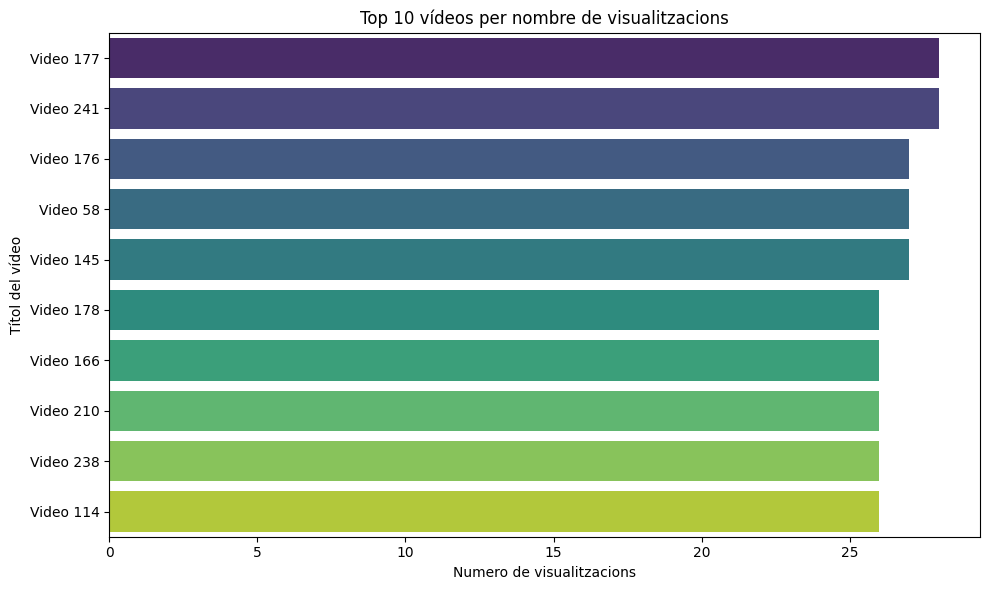

In [6]:
# Barplot dels 10 vídeos més vistos (count de views) — detectar la columna title després de merges
title_col = next((c for c in ['title', 'title_x', 'title_y'] if c in views_df.columns), None)
if title_col is None:
    raise KeyError(f"No s'ha trobat una columna 'title' a views_df. Columnes disponibles: {list(views_df.columns)}")
top_videos = views_df[title_col].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_videos.values, y=top_videos.index, palette='viridis')
plt.xlabel('Numero de visualitzacions')
plt.ylabel('Títol del vídeo')
plt.title('Top 10 vídeos per nombre de visualitzacions')
plt.tight_layout()
plt.show()

Visualització 2: heatmap amb counts per genre vs country (top països).

In [7]:
# Heatmap de visualitzacions per país i gènere — detectar noms de columnes després de merges
country_col = next((c for c in ['country', 'country_x', 'country_y'] if c in views_df.columns), None)
gender_col = next((c for c in ['gender', 'gender_x', 'gender_y'] if c in views_df.columns), None)
if country_col is None or gender_col is None:
    print('No shan trobat les columnes country/gender per construir el heatmap. Columns available:', list(views_df.columns))
else:
    plt.figure(figsize=(12,6))
    # Opcional: limitar a top països per nombre de visualitzacions per llegibilitat
    top_countries = views_df[country_col].value_counts().nlargest(8).index.tolist()
    heatmap_df = views_df[views_df[country_col].isin(top_countries)].pivot_table(index=gender_col, columns=country_col, values='view_id', aggfunc='count', fill_value=0)
    sns.heatmap(heatmap_df, cmap='YlGnBu', annot=True, fmt='d')
    plt.xlabel('País')
    plt.ylabel('Gènere')
    plt.title('Mapa de calor de visualitzacions per país i gènere (top països)')
    plt.tight_layout()
    plt.show()

No shan trobat les columnes country/gender per construir el heatmap. Columns available: ['view_id', 'viewer_id', 'video_id', 'watch_minutes', 'view_date', 'completed', 'title', 'genre', 'duration_min', 'publish_date', 'name', 'age', 'country', 'subscription', 'pct_watched']


Visualització 3: evolució setmanal d’hores vistes.

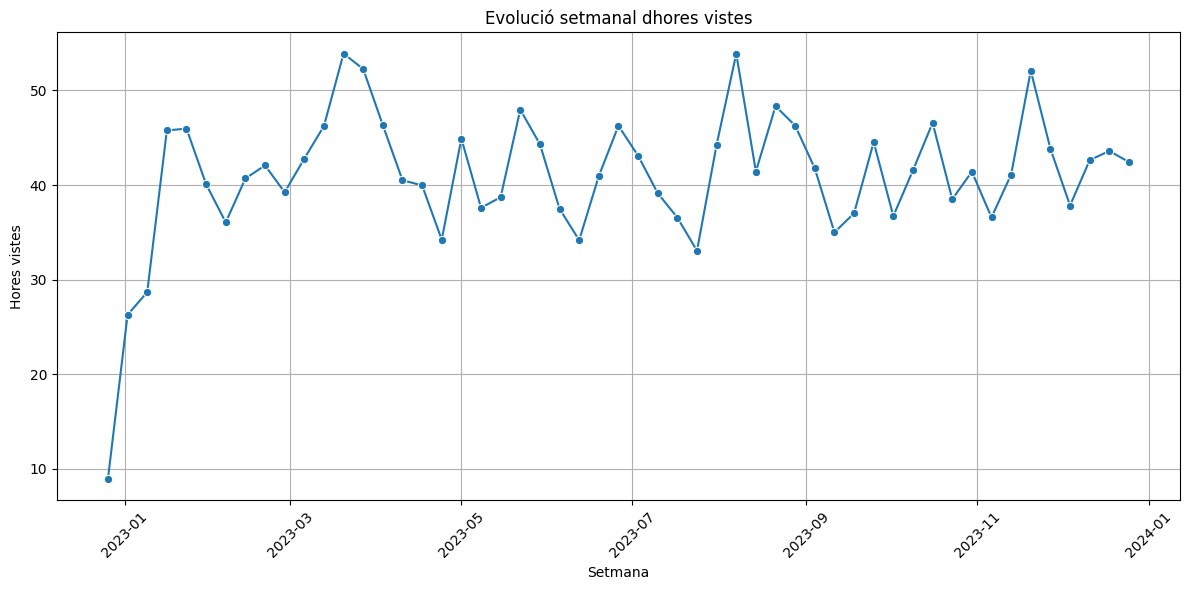

In [8]:
# Evolució setmanal d'hores vistes
views_df['view_date'] = pd.to_datetime(views_df['view_date'], errors='coerce')
# convertir a data d'inici de setmana per agrupar
views_df['week_start'] = views_df['view_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly = views_df.groupby('week_start')['watch_minutes'].sum().reset_index()
weekly['watch_hours'] = weekly['watch_minutes'] / 60
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly, x='week_start', y='watch_hours', marker='o')
plt.xlabel('Setmana')
plt.ylabel('Hores vistes')
plt.title('Evolució setmanal dhores vistes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualització 4: comparativa watch time mitjà entre subscription types.

C:\Users\alanr\AppData\Local\Temp\ipykernel_13132\4134095160.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_avg, x=sub_col, y='watch_minutes', palette='Set2')


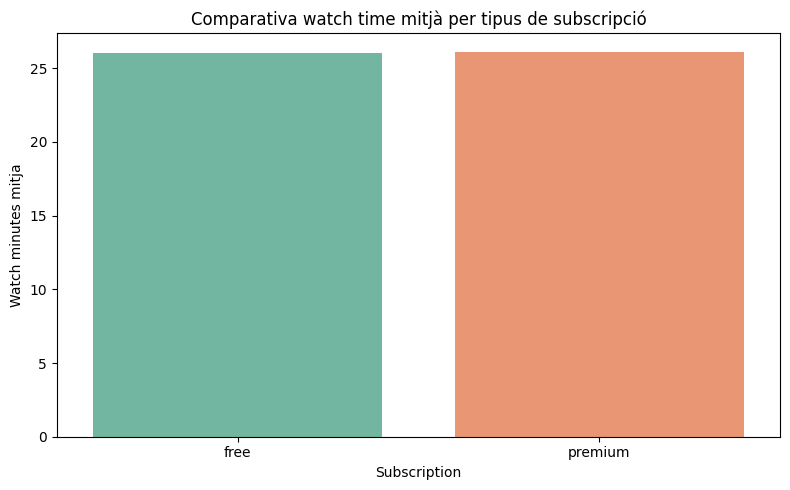

In [9]:
# Comparativa del watch time mitjà entre tipus de subscripció
sub_col = next((c for c in ['subscription','subscription_x','subscription_y'] if c in views_df.columns), None)
if sub_col is None:
    print('No hi ha columna de subscription per comparar')
else:
    sub_avg = views_df.groupby(sub_col)['watch_minutes'].mean().reset_index()
    sub_avg['watch_minutes'] = sub_avg['watch_minutes'].round(2)
    plt.figure(figsize=(8,5))
    sns.barplot(data=sub_avg, x=sub_col, y='watch_minutes', palette='Set2')
    plt.xlabel('Subscription')
    plt.ylabel('Watch minutes mitja')
    plt.title('Comparativa watch time mitjà per tipus de subscripció')
    plt.tight_layout()
    plt.show()

Top 5 vídeos amb major completion_rate (percentatge de views completades).

C:\Users\alanr\AppData\Local\Temp\ipykernel_13132\4261843296.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=completion_filtered, x='completion_rate', y=title_col, palette='coolwarm')


Top 5 vídeos per completion_rate (mínim 5 views):
 views  completion_rate     title
    13        46.153846  Video 25
    13        38.461538 Video 175
    19        36.842105 Video 150
    11        36.363636   Video 1
    14        35.714286  Video 32


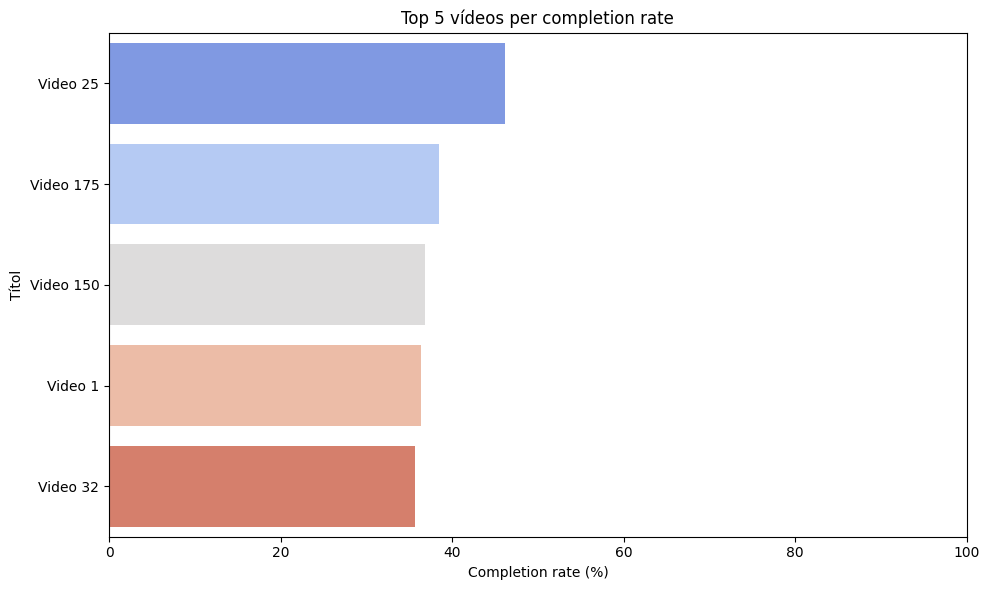

In [10]:
# Top 5 vídeos amb major completion_rate (percentatge de views completades)
title_col = next((c for c in ['title','title_x','title_y'] if c in views_df.columns), None)
if title_col is None or 'completed' not in views_df.columns:
    print('Falta columna title o completed per calcular completion_rate')
else:
    completion = views_df.groupby(title_col).agg(completion_rate=('completed','mean'), views=('view_id','count')).reset_index()
    completion['completion_rate'] = completion['completion_rate'] * 100
    # Opcional: filtrar vídeos amb un mínim de visualitzacions per evitar soroll
    completion_filtered = completion[completion['views'] >= 5].sort_values('completion_rate', ascending=False).head(5)
    print('Top 5 vídeos per completion_rate (mínim 5 views):')
    print(completion_filtered[['views', 'completion_rate', title_col]].to_string(index=False))
    plt.figure(figsize=(10,6))
    sns.barplot(data=completion_filtered, x='completion_rate', y=title_col, palette='coolwarm')
    plt.xlabel('Completion rate (%)')
    plt.xlim(0,100)
    plt.ylabel('Títol')
    plt.title('Top 5 vídeos per completion rate')
    plt.tight_layout()
    plt.show()